A player must have a minimum of 3,000 plate appearances in order to qualify for overall BA record
****Maybe Drop players who havent played in a full seasons worth of games?****
****Need to fix integrating player name and yearID (Do we do a range?)
****Figure out how we decide who belongs in each decade
*If we want to do regression- data has to be on career level- but then parsing out decades is hard
    *Maybe we then do regression of what plays into getting into HOF overall and then use a groupby decade to show differences 
     in summary statisics over time- do hypothesis testing on this to tell if players are statistically better now vs then?
****Want column of binary 1 or 0 for whether or not player is in HOF

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [2]:
#Importing data into dataframes
HOF_Batting = pd.read_csv('Output/HOF_Batting_stats.csv')
HOF_Post_Batting = pd.read_csv('Output/HOF_Postseason_Batting_stats.csv')
Post_Batting = pd.read_csv('Output/Postseason_Batting_stats.csv')
Reg_Batting = pd.read_csv('Output/Reg_season_Batting_stats.csv')


In [3]:
HOF_Batting.head()


,playerID,Name,yearID,G,AB,R,H,2B,3B,HR,RBI,BB,IBB,HBP
0,aaronha01,Hank Aaron,1954,122,468,58,131,27,6,13,69.0,28,0.0,3.0
1,aaronha01,Hank Aaron,1955,153,602,105,189,37,9,27,106.0,49,5.0,3.0
2,aaronha01,Hank Aaron,1956,153,609,106,200,34,14,26,92.0,37,6.0,2.0
3,aaronha01,Hank Aaron,1957,151,615,118,198,27,6,44,132.0,57,15.0,0.0
4,aaronha01,Hank Aaron,1958,153,601,109,196,34,4,30,95.0,59,16.0,1.0


In [4]:
#Using GroupBy playerID to get career statistics for players
career_HOF_Post_Batting = HOF_Post_Batting.groupby(['playerID','Name']).agg({
             'yearID':['min', 'max'],
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
career_HOF_Post_Batting.head()

playerID            Name yearID         G   AB   R   H  2B  3B  HR RBI  \
                                min   max sum  sum sum sum sum sum sum sum   
0  aaronha01      Hank Aaron   1957  1969  17   69  11  25   4   1   6  16   
1  alexape01  Pete Alexander   1915  1928   7   13   1   1   0   0   0   1   
2  alomaro01  Roberto Alomar   1991  2001  58  230  32  72  17   1   4  33   
3  ansonca01       Cap Anson   1885  1886  13   47  11  16   2   1   0   1   
4  aparilu01   Luis Aparicio   1959  1966  10   42   1  12   2   0   0   2   

   BB IBB  HBP  
  sum sum  sum  
0   5   0  0.0  
1   0   0  0.0  
2  27   3  0.0  
3   6   0  0.0  
4   2   0  0.0

In [5]:
#Using GroupBy playerID to get career statistics for players
career_HOF_Batting = HOF_Batting.groupby(['playerID','Name']).agg({
             'yearID':['min', 'max'],
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
career_HOF_Batting.head()



playerID            Name yearID           G     AB     R     H   2B   3B  \
                                min   max   sum    sum   sum   sum  sum  sum   
0  aaronha01      Hank Aaron   1954  1976  3298  12364  2174  3771  624   98   
1  alexape01  Pete Alexander   1911  1930   703   1810   154   378   60   13   
2  alomaro01  Roberto Alomar   1988  2004  2379   9073  1508  2724  504   80   
3  ansonca01       Cap Anson   1871  1897  2524  10281  1999  3435  582  142   
4  aparilu01   Luis Aparicio   1956  1973  2601  10230  1335  2677  394   92   

    HR     RBI    BB    IBB   HBP  
   sum     sum   sum    sum   sum  
0  755  2297.0  1402  293.0  32.0  
1   11   163.0    77    0.0   2.0  
2  210  1134.0  1032   62.0  50.0  
3   97  2075.0   984    0.0  32.0  
4   83   791.0   736   22.0  27.0

In [6]:
#Using GroupBy playerID to get career statistics for players
career_Post_Batting = Post_Batting.groupby(['playerID','Name']).agg({
             'yearID':['min', 'max'],
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
career_Post_Batting.head()

playerID            Name yearID         G  AB   R   H  2B  3B  HR RBI  BB  \
                                min   max sum sum sum sum sum sum sum sum sum   
0  aaronha01      Hank Aaron   1957  1969  17  69  11  25   4   1   6  16   5   
1  aaronto01    Tommie Aaron   1969  1969   1   1   0   0   0   0   0   0   0   
2   aasedo01        Don Aase   1979  1979   2   0   0   0   0   0   0   0   0   
3   abadfe01   Fernando Abad   2014  2014   1   0   0   0   0   0   0   0   0   
4  abbated01  Ed Abbaticchio   1909  1909   1   1   0   0   0   0   0   0   0   

  IBB  HBP  
  sum  sum  
0   0  0.0  
1   0  0.0  
2   0  0.0  
3   0  0.0  
4   0  0.0

In [7]:
#Using GroupBy playerID to get career statistics for players
career_Reg_Batting = Reg_Batting.groupby(['playerID','Name']).agg({
             'yearID':['min', 'max'],
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
career_Reg_Batting.head()

playerID           Name yearID           G     AB     R     H   2B  3B  \
                               min   max   sum    sum   sum   sum  sum sum   
0  aardsda01  David Aardsma   2004  2015   331      4     0     0    0   0   
1  aaronha01     Hank Aaron   1954  1976  3298  12364  2174  3771  624  98   
2  aaronto01   Tommie Aaron   1962  1971   437    944   102   216   42   6   
3   aasedo01       Don Aase   1977  1990   448      5     0     0    0   0   
4   abadan01      Andy Abad   2001  2006    15     21     1     2    0   0   

    HR     RBI    BB    IBB   HBP  
   sum     sum   sum    sum   sum  
0    0     0.0     0    0.0   0.0  
1  755  2297.0  1402  293.0  32.0  
2   13    94.0    86    3.0   0.0  
3    0     0.0     0    0.0   0.0  
4    0     0.0     4    0.0   0.0

In [8]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career Dataframe
career_Reg_Batting['BA'] = career_Reg_Batting['H'] / career_Reg_Batting['AB']
career_Reg_Batting['OBP'] = (
    (career_Reg_Batting['H'] + career_Reg_Batting['BB']  + career_Reg_Batting['HBP']) 
    / (career_Reg_Batting['AB'] + career_Reg_Batting['BB']  + career_Reg_Batting['HBP'])
                               )
career_Reg_Batting['SLG']= ( ((career_Reg_Batting['H'] - (career_Reg_Batting['2B'] + career_Reg_Batting['3B'] + career_Reg_Batting['HR']) )
                              + 2*career_Reg_Batting['2B'] + 3*career_Reg_Batting['3B'] + 4*career_Reg_Batting['HR'])
                            / (career_Reg_Batting['AB'])
                            )
#career_Reg_Batting.head()

In [9]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career HOF Dataframe
career_HOF_Batting['BA'] = career_HOF_Batting['H'] / career_HOF_Batting['AB']
career_HOF_Batting['OBP'] = (
    (career_HOF_Batting['H'] + career_HOF_Batting['BB']  + career_HOF_Batting['HBP']) 
    / (career_HOF_Batting['AB'] + career_HOF_Batting['BB']  + career_HOF_Batting['HBP'])
                               )
career_HOF_Batting['SLG']= ( ((career_HOF_Batting['H'] - (career_HOF_Batting['2B'] + career_HOF_Batting['3B'] + career_HOF_Batting['HR']) )
                              + 2*career_HOF_Batting['2B'] + 3*career_HOF_Batting['3B'] + 4*career_HOF_Batting['HR'])
                            / (career_HOF_Batting['AB'])
                            )
#career_HOF_Batting.head()

In [10]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career Postseason Dataframe
career_Post_Batting['BA'] = career_Post_Batting['H'] / career_Post_Batting['AB']
career_Post_Batting['OBP'] = (
    (career_Post_Batting['H'] + career_Post_Batting['BB']  + career_Post_Batting['HBP']) 
    / (career_Post_Batting['AB'] + career_Post_Batting['BB']  + career_Post_Batting['HBP'])
                               )
career_Post_Batting['SLG']= ( ((career_Post_Batting['H'] - (career_Post_Batting['2B'] + career_Post_Batting['3B'] + career_Post_Batting['HR']) )
                              + 2*career_Post_Batting['2B'] + 3*career_Post_Batting['3B'] + 4*career_Post_Batting['HR'])
                            / (career_Post_Batting['AB'])
                            )
#career_Post_Batting.head()

In [12]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Career HOF Postseason Dataframe
career_HOF_Post_Batting['BA'] = career_HOF_Post_Batting['H'] / career_HOF_Post_Batting['AB']
career_HOF_Post_Batting['OBP'] = (
    (career_HOF_Post_Batting['H'] + career_HOF_Post_Batting['BB']  + career_HOF_Post_Batting['HBP']) 
    / (career_HOF_Post_Batting['AB'] + career_HOF_Post_Batting['BB']  + career_HOF_Post_Batting['HBP'])
                               )
career_HOF_Post_Batting['SLG']= ( ((career_HOF_Post_Batting['H'] - (career_HOF_Post_Batting['2B'] + career_HOF_Post_Batting['3B'] + career_HOF_Post_Batting['HR']) )
                              + 2*career_HOF_Post_Batting['2B'] + 3*career_HOF_Post_Batting['3B'] + 4*career_HOF_Post_Batting['HR'])
                            / (career_HOF_Post_Batting['AB'])
                            )
#career_HOF_Post_Batting.head()

In [13]:
#Getting some aggregated summary statistics to better understand the data
career_HOF_Batting_summary = career_HOF_Batting.BA.agg(['mean','max', 'min', 'std'])
career_HOF_Post_Batting_summary = career_HOF_Post_Batting.BA.agg(['mean','max', 'min', 'std'])
career_Reg_Post_Batting_summary =career_Post_Batting.BA.agg(['mean','max', 'min', 'std'])
career_Reg_Batting_summary = career_Reg_Batting.BA.agg(['mean','max', 'min', 'std'])

In [14]:
print('Career Batting')
career_Reg_Batting_summary

Career Batting


mean    0.189494
max     1.000000
min     0.000000
std     0.119934
Name: BA, dtype: float64

In [15]:
print('Career HOF Batting')
career_HOF_Batting_summary

Career HOF Batting


mean    0.262640
max     0.366331
min     0.000000
std     0.067390
Name: BA, dtype: float64

In [16]:
print('Career Postseason Batting')
career_Reg_Post_Batting_summary

Career Postseason Batting


mean    0.197457
max     1.000000
min     0.000000
std     0.181292
Name: BA, dtype: float64

In [17]:
print('Career HOF Postseason Batting')
career_HOF_Post_Batting_summary


Career HOF Postseason Batting


mean   NaN
max    NaN
min    NaN
std    NaN
Name: BA, dtype: float64

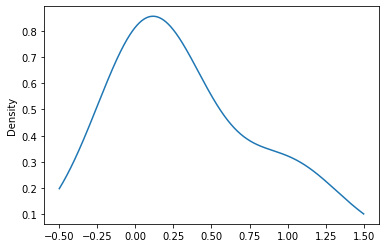

In [95]:
#Density plot of above summary statistic
career_Reg_Batting_summary.plot.kde()


In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [1]:
# Original author: Thomas Haslwanter

import numpy as np
import matplotlib.pyplot as plt
import pandas

# For 3d plots. This import is necessary to have 3D plotting below
from mpl_toolkits.mplot3d import Axes3D

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

Text(0.5, 0, 'Z')

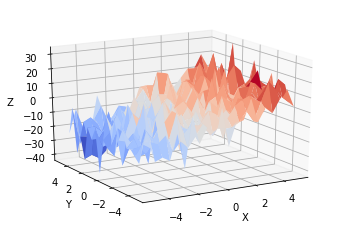

In [2]:
x = np.linspace(-5, 5, 21)
# We generate a 2D grid
X, Y = np.meshgrid(x, x)

# To get reproducable values, provide a seed value
np.random.seed(1)

# Z is the elevation of this 2D grid
Z = -5 + 3*X - 0.5*Y + 8 * np.random.normal(size=X.shape)

# Plot the data
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
                       rstride=1, cstride=1)
ax.view_init(20, -120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [3]:
# Convert the data into a Pandas DataFrame to use the formulas framework
# in statsmodels

# First we need to flatten the data: it's 2D layout is not relevent.
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

data = pandas.DataFrame({'x': X, 'y': Y, 'z': Z})

# Fit the model
model = ols("z ~ x + y", data).fit()

# Print the summary
print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)
# should be array([-4.99754526,  3.00250049, -0.50514907])

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

plt.show()

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     320.4
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           1.89e-86
Time:                        21:29:36   Log-Likelihood:                -1537.7
No. Observations:                 441   AIC:                             3081.
Df Residuals:                     438   BIC:                             3094.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5052      0.378    -11.924      0.0

In [ ]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import spearmanr